# Set up environment


In [17]:
import tweepy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [10]:
CONSUMER_API_KEY = 'HXYBuyZLzzRZghuBueZvwx6Xr'
CONSUMER_API_SECRET = 'sXspcZNp0gJD0YYSQAQA4aZa4XpHhFnW0SiKg3tNR60FhYNc3P'
ACCESS_KEY = '1582982696313257984-HXQtp5N12fm7W21B6PycenaLbFPLyT'
ACCESS_SECRET = 'uK8xn2PKLhPnufd3GlKygygPN7VxyF6BOnc5p3CzoIL3r'

In [11]:
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

# Search tweets containing #Organic

In [12]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdf = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

In [ ]:
itemdf.to_csv("organic.csv")

In [13]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    tweets.append(tweet)

In [15]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

,hashtag,count
214,organic,50
267,shopping,6
20,berlin,5
89,fashion,5
52,clothing,5
...,...,...
128,hairgrowth,1
127,hairfall,1
123,guelph,1
122,growyourownfood,1


## Sentiment analysis #Organic

In [43]:
sia = SentimentIntensityAnalyzer()

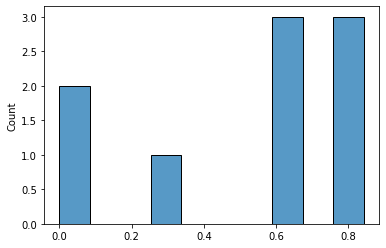

In [44]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [45]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

,organicwine_score
0,0.7717
1,0.6114
2,0.0000
3,0.2960
4,0.0000
5,0.6597
6,0.8172
7,0.6705
8,0.8425


In [46]:
organicwine_score.describe()

,organicwine_score
count,9.000000
mean,0.518778
std,0.334882
min,0.000000
25%,0.296000
50%,0.659700
75%,0.771700
max,0.842500


Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

**The public's view to organic is positive**

# Search tweets containing #Organic AND #wine (seperate)

In [20]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic AND wine -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdfANDextended = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

In [ ]:
itemdfANDextended.to_csv("organic AND wine extended.csv")

In [21]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic AND wine -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    tweets.append(tweet)

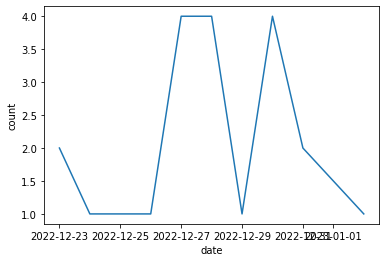

In [22]:
#Create day count
tweet_day = [tweet.created_at.date() for tweet in tweets]
tweet_day_df = pd.DataFrame(tweet_day,columns=['date'])
tweet_day_df = tweet_day_df.groupby('date')['date'].count().reset_index(name='count')
sns.lineplot(y=tweet_day_df['count'], x = tweet_day_df['date'])
plt.show()

In [23]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

,hashtag,count
67,organic,22
100,wine,16
31,foodie,4
49,japanesefood,3
34,freshmeat,3
...,...,...
35,fudre,1
33,franklandestatewines,1
32,franklandestate,1
29,floral,1


## Sentiment analysis #Organic AND #wine

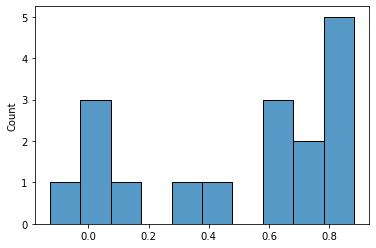

In [101]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [102]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

,organicwine_score
0,0.6114
1,0.7896
2,0.0000
3,0.8475
4,0.3612
5,0.6981
6,0.3818
7,0.8316
8,0.0000
9,-0.1280


In [103]:
organicwine_score.describe()

,organicwine_score
count,17.000000
mean,0.483094
std,0.355816
min,-0.128000
25%,0.128000
50%,0.611400
75%,0.789600
max,0.882800


Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

**The public's view to organic wine is positive**

# Search tweets containg #organicwine (fulltext)

In [24]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organicwine -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdf_extended = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

In [ ]:
itemdf_extended.to_csv("organicwine_extended.csv")

In [25]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organicwine -filter:retweets", 
                           lang="en", tweet_mode='extended').items(50):
    tweets.append(tweet)

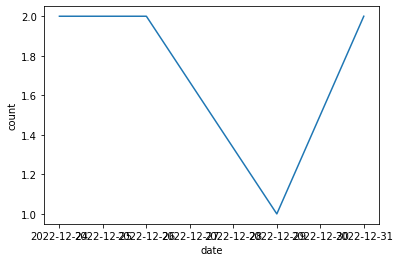

In [26]:
#Create day count
tweet_day = [tweet.created_at.date() for tweet in tweets]
tweet_day_df = pd.DataFrame(tweet_day,columns=['date'])
tweet_day_df = tweet_day_df.groupby('date')['date'].count().reset_index(name='count')
sns.lineplot(y=tweet_day_df['count'], x = tweet_day_df['date'])
plt.show()

In [27]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

,hashtag,count
15,italy,4
45,wine,4
14,italianwine,4
53,winetravel,3
36,tuscany,3
28,organicwinery,3
20,maremma,3
34,sangiovese,3
13,instawine,3
24,naturalwines,3


## Finding out if lots of people talking about #Organicwine

In [28]:
organicwine_tweets = []
for tweet in tweets:
    if 'organicwine' in tweet.full_text.lower():
        organicwine_tweets.append(tweet)

In [29]:
user_dict = {}
for tweet in organicwine_tweets:
    name = tweet.user.screen_name
    if name in user_dict:
        user_dict[name].append(tweet)
    else:
        user_dict[name] = [tweet]

In [30]:
active_tweeters = []
inactive_tweeters = []
for name in user_dict:
    if len(user_dict[name]) > 1:
        active_tweeters.append(user_dict[name][0].user)
    else:
        inactive_tweeters.append(user_dict[name][0].user)

In [31]:
print("There are " + str(len(active_tweeters)) + " users that wrote more than once about Organicwine")
print("There are " + str(len(inactive_tweeters)) + " users that wrote only once about Organicwine")

There are 3 users that wrote more than once about Organicwine
There are 2 users that wrote only once about Organicwine


## Text analysis #Organicwine

In [32]:
tweet = tweets[0]
tweet.full_text.split()

['Wishing',
 'you',
 'a',
 'merry',
 'and',
 'rosé',
 '2023',
 '✨',
 'Please',
 'drink',
 'responsibly.',
 '#drinkpink',
 '#rosewine',
 '#chateaulagordonne',
 '#véritéduterroir',
 '#provencewine',
 '#frenchwine',
 '#roseeveryday',
 '#LaChapelle',
 '#organicwine',
 '#bio',
 'https://t.co/SM4paSLG4Q']

In [33]:
text_list = [tweet.full_text for tweet in tweets]
word_list = [word.lower() for text in text_list for word in text.split() ]
word_list = [word.replace('#','') for word in word_list ]
word_list

['wishing',
 'you',
 'a',
 'merry',
 'and',
 'rosé',
 '2023',
 '✨',
 'please',
 'drink',
 'responsibly.',
 'drinkpink',
 'rosewine',
 'chateaulagordonne',
 'véritéduterroir',
 'provencewine',
 'frenchwine',
 'roseeveryday',
 'lachapelle',
 'organicwine',
 'bio',
 'https://t.co/sm4paslg4q',
 'happy',
 'transition',
 '-',
 'c',
 'u',
 '2023!',
 'breathtakingviews',
 'valdonica',
 'maremma',
 'toscana',
 'naturalwines',
 'naturalwinelover',
 'winetour',
 'instawine',
 'tuscany',
 'italy',
 'italianwine',
 'visittuscany',
 'organicwine',
 'organicwinery',
 'vermentino',
 'sangiovese',
 'wineenthusiast',
 'winetravel',
 'wine',
 'https://t.co/3wjgtzdpu7',
 'somewhere',
 'between',
 'harvest',
 'and',
 'bottling,',
 'winemakers',
 'meet',
 'to',
 'select',
 'wines',
 'from',
 'individual',
 'tanks',
 'to',
 'blend',
 'into',
 'the',
 'finished',
 'wine.',
 "here's",
 'a',
 'behind-the-scenes',
 'look',
 'at',
 'the',
 "winemakers'",
 'process!',
 '📸:',
 'andy',
 'nelson',
 'kingestatewinery'

In [34]:
word_df = pd.DataFrame(word_list,columns=['word'])
word_df = word_df.groupby('word')['word'].count().reset_index(name='count')
word_df.sort_values(by='count',ascending=False).head(15)

,word,count
87,organicwine,9
107,the,6
65,italy,4
6,and,4
123,wine,4
64,italianwine,4
18,breathtakingviews,3
42,happy,3
112,tuscany,3
119,visittuscany,3


## Sentiment analysis #Organicwine

In [35]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/irene/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/irene/nltk_data...


True

In [37]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
word_df = word_df[~(word_df['word'].isin(nltk.corpus.stopwords.words('english')))]
word_df.sort_values(by='count',ascending=False).head(15)

,word,count
87,organicwine,9
64,italianwine,4
65,italy,4
123,wine,4
119,visittuscany,3
114,valdonica,3
61,instawine,3
102,sangiovese,3
109,toscana,3
112,tuscany,3


In [42]:
tweet = tweets[0]
print(tweet.full_text)
sia.polarity_scores(tweet.full_text)['compound']

Wishing you a merry and rosé 2023 ✨

Please drink responsibly.

#drinkpink #rosewine #chateaulagordonne #véritéduterroir #provencewine #frenchwine #roseeveryday #LaChapelle #organicwine #bio https://t.co/SM4paSLG4Q


0.7717

In [40]:
sia = SentimentIntensityAnalyzer()

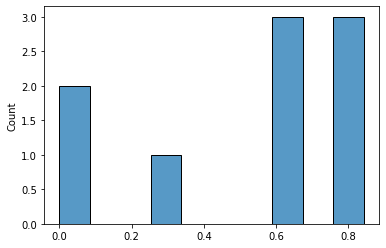

In [41]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [47]:
compound_scores

[0.7717, 0.6114, 0.0, 0.296, 0.0, 0.6597, 0.8172, 0.6705, 0.8425]

In [48]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

,organicwine_score
0,0.7717
1,0.6114
2,0.0000
3,0.2960
4,0.0000
5,0.6597
6,0.8172
7,0.6705
8,0.8425


In [49]:
organicwine_score.describe()

,organicwine_score
count,9.000000
mean,0.518778
std,0.334882
min,0.000000
25%,0.296000
50%,0.659700
75%,0.771700
max,0.842500


Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

**The public's view to organic wine is positive**